## Programming Assignment 3 Part 1 - SVM

### 1. Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

### 2. Reading and Pre-processing the Data

#### 2.1. Reading Data

In [3]:
data = pd.read_csv("HIGGS.csv",header = None)

#### 2.2. Sampeling Data

In [4]:
sample_data = data.sample(frac = 0.001,random_state=42)

In [5]:
sample_data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
3967303,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
5946179,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
6910558,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3414332,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
5840458,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339


In [6]:
target = sample_data.iloc[:,0]  
features = sample_data.iloc[:,1:]  

In [7]:
sample_data.shape

(11000, 29)

#### 2.3. Finding Missing Values

In [8]:
print("Total Missing Values in each Column : ",sample_data.isnull().sum(),sep="\n")

Total Missing Values in each Column : 
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int64


In [9]:
sample_data.dropna()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
3967303,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
5946179,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
6910558,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3414332,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
5840458,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461673,1.0,0.644375,0.388559,1.115688,1.863873,-1.667447,2.006106,0.716901,0.408181,0.000000,...,0.667464,-1.687755,0.000000,0.683925,0.730265,0.994236,0.849862,0.925249,0.887328,0.723851
725916,1.0,0.843489,-1.031487,-0.268239,0.822397,1.720296,0.603966,-2.411235,-0.864216,0.000000,...,-0.677546,1.331073,0.000000,0.905544,0.665258,1.125674,0.597078,0.473835,0.476952,0.494090
810666,0.0,1.639395,0.001894,-1.492821,0.252484,-0.945773,0.552117,-0.039635,1.185415,2.173076,...,1.571077,-0.167848,0.000000,0.456711,0.703296,0.980254,1.404764,1.227821,1.009991,0.802918
593412,0.0,0.937190,-0.252312,-1.124393,1.240993,0.180339,0.655083,-0.324821,0.850018,2.173076,...,0.396796,-0.495246,0.000000,0.215285,0.780952,1.379334,0.820861,0.335169,0.652998,0.607626


#### 2.4. Visulaize Features

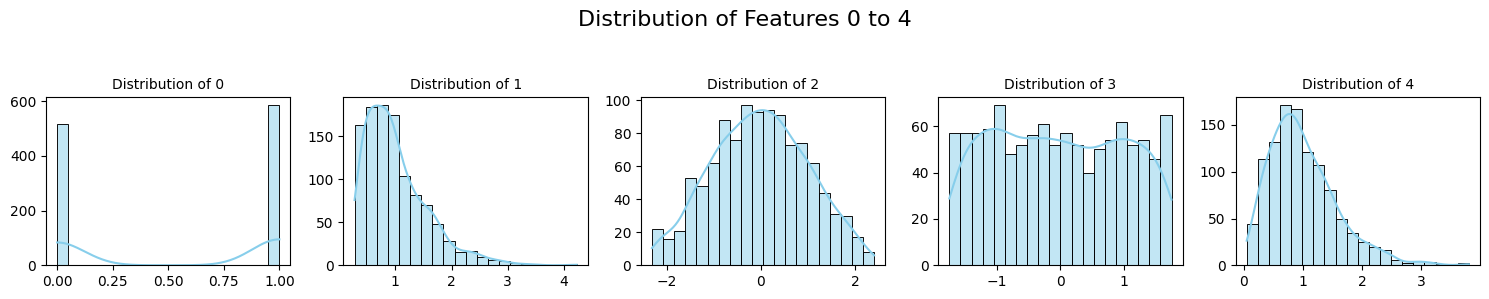

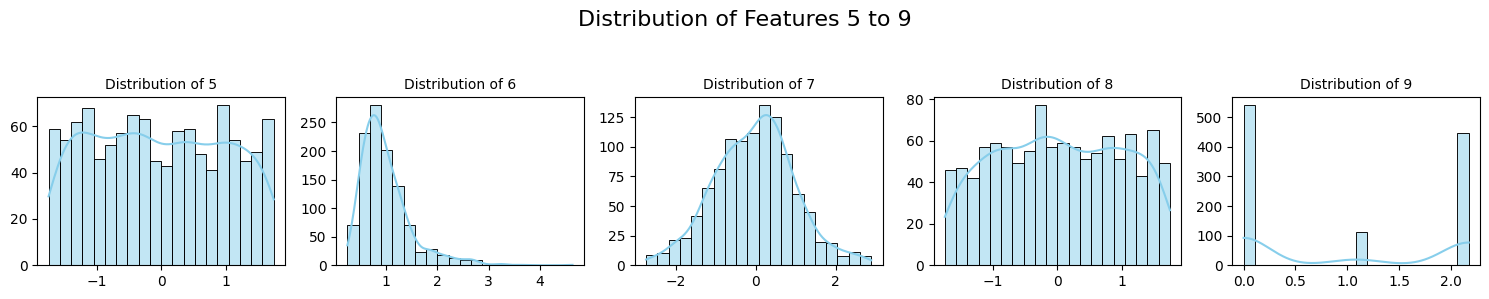

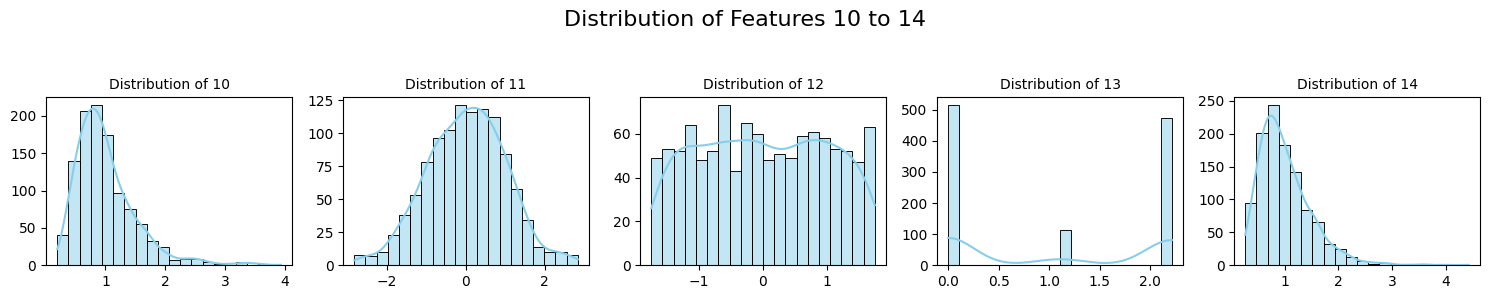

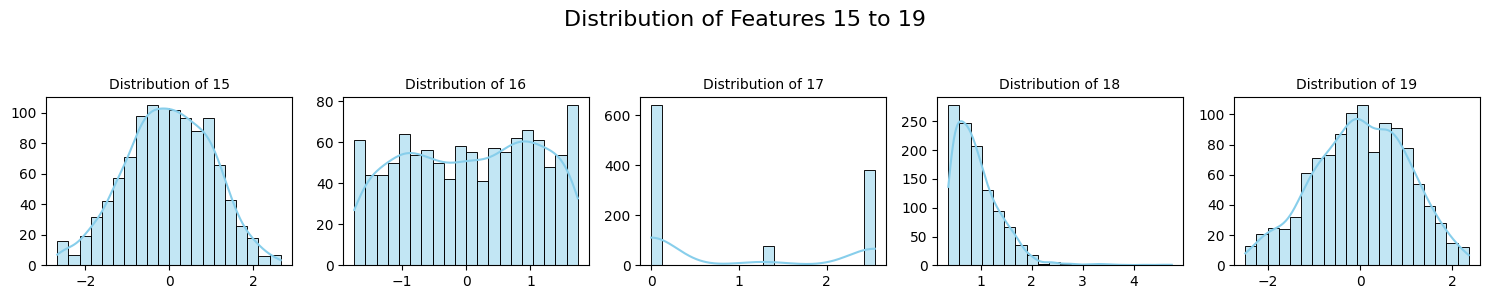

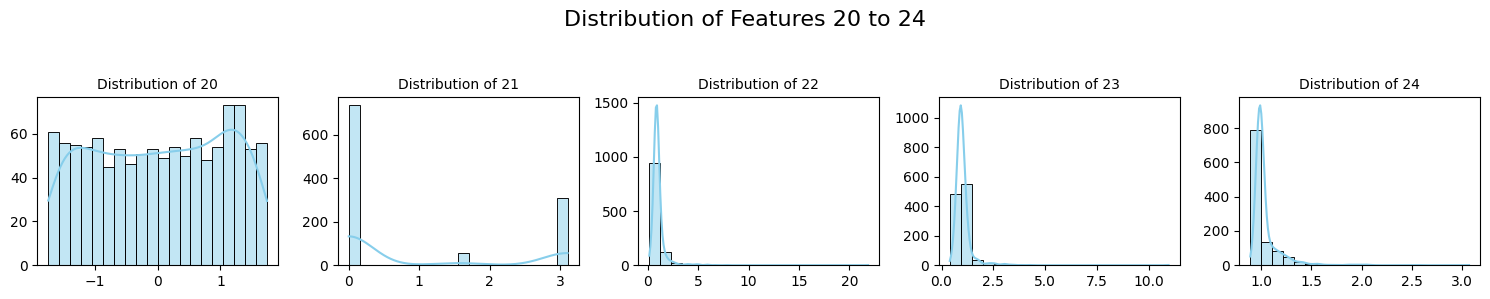

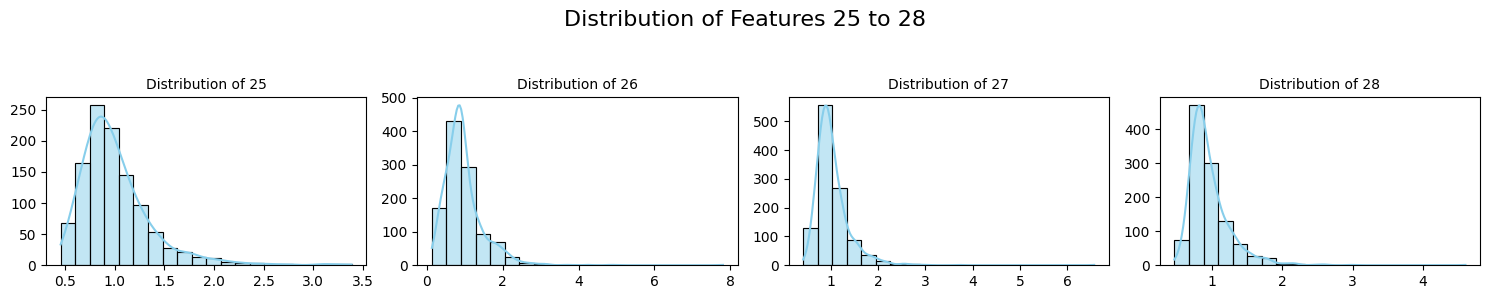

In [10]:
# Parameters for batch size
batch_size = 5  # Number of features to plot at once

# Downsample data if very large
sample_data_downsampled = sample_data.sample(frac=0.1, random_state=1) if len(sample_data) > 10000 else sample_data

# Loop through features in batches
num_features = len(sample_data_downsampled.columns)
for start in range(0, num_features, batch_size):
    end = min(start + batch_size, num_features)
    batch_columns = sample_data_downsampled.columns[start:end]

    # Set up the figure for the current batch
    fig, axes = plt.subplots(1, len(batch_columns), figsize=(15, 3))  # Adjust width based on batch size
    fig.suptitle(f'Distribution of Features {start} to {end-1}', fontsize=16)

    # If only one feature in batch, `axes` won't be an array, so we make it one
    if len(batch_columns) == 1:
        axes = [axes]

    # Plot each feature in the batch
    for i, col in enumerate(batch_columns):
        sns.histplot(sample_data_downsampled[col], bins=20, ax=axes[i], kde=True, color="skyblue")
        axes[i].set_title(f'Distribution of {col}', fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust layout to fit title
    plt.show()

#### 2.5. Data Scaling

In [11]:

# Assuming sample_data is already defined and is a DataFrame
# Scale the data (exclude the first row if it's header)
scaler = StandardScaler()
new_data = scaler.fit_transform(features)
sample_data.columns = sample_data.columns.astype(str)
nd = pd.DataFrame(new_data, columns=features.columns)

#### 2.6. Finiding Outliners

In [12]:

# Calculate z-scores to remove outliers
z_scores = np.abs((new_data - new_data.mean(axis=0)) / new_data.std(axis=0))
threshold = 2.5
# Keep only the rows that are within the threshold
mask = (z_scores < threshold).all(axis=1)
data_cleaned = new_data[mask]

print("Original data shape:", new_data.shape)
print("Cleaned data shape:", data_cleaned.shape)

Original data shape: (11000, 28)
Cleaned data shape: (8526, 28)


#### 2.7. Feature Engineering

In [13]:
# Create polynomial features from the cleaned data
PolyExtrac = PolynomialFeatures(degree=2, include_bias=False)
poly_data = pd.DataFrame(PolyExtrac.fit_transform(features))  # Use cleaned data

In [14]:
X =  pd.concat([poly_data, nd], axis=1)

In [15]:
y = target

In [16]:
X.shape

(11000, 462)

In [17]:
y.shape

(11000,)

#### 2.8. Feature Selection

In [18]:


X.columns = X.columns.astype(str)
# Select top features based on ANOVA F-test
k = 10  # Set the desired number of top features
selector = SelectKBest(score_func=f_classif, k=k)  # Initialize SelectKBest

# Fit and transform the dataset to select the top k features
X_kbest = selector.fit_transform(poly_data, y)

# Get the selected feature names
selected_features_kbest = poly_data.columns[selector.get_support()]
print("Top features selected by SelectKBest:", selected_features_kbest.tolist())


Top features selected by SelectKBest: [25, 27, 53, 131, 133, 311, 421, 428, 429, 430]


In [19]:
X = poly_data

In [20]:
print(y)

3967303    0.0
5946179    1.0
6910558    0.0
3414332    0.0
5840458    1.0
          ... 
7461673    1.0
725916     1.0
810666     0.0
593412     0.0
2479919    1.0
Name: 0, Length: 11000, dtype: float64


### 2. Linear SVM

In [21]:
Linear_Model = SVC(kernel='linear', probability=True, random_state=42)

In [22]:
sample_indices = np.random.choice(range(len(X)), size=int(0.1 * len(X)), replace=False)

In [23]:
Feature_part = X.iloc[sample_indices].values
Target_part = y.iloc[sample_indices]

In [24]:
# Perform Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3 folds

In [25]:
# Generate cross-validated predictions
Start = time.time()
from sklearn.model_selection import cross_val_predict
Pred = cross_val_predict(Linear_Model, Feature_part, Target_part, cv=cv)

In [26]:
Prob = cross_val_predict(Linear_Model, Feature_part, Target_part, cv=cv, method='predict_proba')[:, 1]
Score = roc_auc_score(Target_part, Prob)

End = time.time()
SVM_Linear_Time = End - Start
print("AUC Score:", Score)

AUC Score: 0.5797479226589966


In [27]:
from sklearn.metrics import classification_report
Gen = classification_report(Target_part, Pred)

# Print classification metrics
print(Gen)
print("AUC Score:", Score)

              precision    recall  f1-score   support

         0.0       0.52      0.53      0.52       504
         1.0       0.59      0.58      0.59       596

    accuracy                           0.56      1100
   macro avg       0.55      0.55      0.55      1100
weighted avg       0.56      0.56      0.56      1100

AUC Score: 0.5797479226589966


#### SGD CLASSIFIER

In [28]:
from sklearn.linear_model import SGDClassifier
Start = time.time()
sgd_model = SGDClassifier(loss='hinge', random_state=42)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

Pred = cross_val_predict(sgd_model, Feature_part, Target_part, cv=cv)

Score = cross_val_predict(sgd_model, Feature_part, Target_part, cv=cv, method='decision_function')
SGD_AUC_SCORE = roc_auc_score(Target_part, Score)

End = time.time()
SGD_TIME = End - Start
print("AUC Score with SGD:", SGD_AUC_SCORE)

SGD_Report = classification_report(Target_part, Pred)

print(SGD_Report)

AUC Score with SGD: 0.5757230744646852
              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53       504
         1.0       0.59      0.55      0.57       596

    accuracy                           0.55      1100
   macro avg       0.55      0.55      0.55      1100
weighted avg       0.55      0.55      0.55      1100



### 3. SVM with Polynomial, RBF, and Custom Kernels 

In [30]:
results_sgd_poly_kernel = {}

sample_indices = np.random.choice(range(len(X)), size=int(0.001 * len(X)), replace=False)

X_p = X.iloc[sample_indices].values
T_p = y.iloc[sample_indices]

degrees = [2, 3, 4]

start_time = time.time()
for degree in degrees:
    mod = PolynomialFeatures(degree=degree, include_bias=False)
    Fetu = mod.fit_transform(X_p)
    
    sgd_model = SGDClassifier(loss='hinge', random_state=42)
    
    Y_pred = cross_val_predict(sgd_model, Fetu, T_p, cv=cv)
    
    Y_prob = cross_val_predict(sgd_model, Fetu, T_p, cv=cv, method='decision_function')
    POLY_AUC_SCORE = roc_auc_score(T_p, Y_prob)
    
    POLY_Report = classification_report(T_p, Y_pred)
    
    results_sgd_poly_kernel[degree] = {
        'AUC Score': POLY_AUC_SCORE,
        'Report': POLY_Report
    }

end_time = time.time()
POLY_TIME = end_time - start_time

for degree, result in results_sgd_poly_kernel.items():
    print(f"Degree: {degree}")
    print(f"AUC Score: {result['AUC Score']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n")


MemoryError: Unable to allocate 124. GiB for an array with shape (11, 1512585914) and data type float64

In [ ]:
results_rbf_kernel = {}

sample_indices = np.random.choice(range(len(X)), size=int(0.01 * len(X)), replace=False)

X_p = X.iloc[sample_indices].values
T_p = y.iloc[sample_indices]

gamma_values = [0.001, 0.01, 0.1, 1, 10]

for gamma in gamma_values:
    start_time = time.time()
    svm_rbf = SVC(kernel='rbf', gamma=gamma, probability=True, random_state=42)
    
    Y_pred = cross_val_predict(svm_rbf, X_p, T_p, cv=cv)
    
    Y_prob = cross_val_predict(svm_rbf, X_p, T_p, cv=cv, method='predict_proba')[:, 1]
    RBF_Score = roc_auc_score(T_p, Y_prob)
    
    Report = classification_report(T_p, Y_pred)
    
    end_time = time.time()
    results_rbf_kernel[gamma] = {
        'AUC Score': RBF_Score,
        'Classification Report': Report,
        'time': end_time - start_time
    }

for gamma, result in results_rbf_kernel.items():
    print(f"Gamma: {gamma}")
    print(f"AUC Score: {result['AUC Score']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n")
    
    param_grid = {'C': [0.1, 1, 10, 100, 1000]}
    
    grid_search = GridSearchCV(svm_rbf, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)

    grid_search.fit(X_p, T_p)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best parameters found: ", best_params)
    print("Best AUC score: ", best_score)


NameError: name 'np' is not defined

In [ ]:
def custom_linear_sigmoid_kernel(X, Y, alpha=0.5, beta=0.5, sigmoid_gamma=0.1, sigmoid_coef0=1):
    # Linear kernel
    linear_kernel = np.dot(X, Y.T)
    
    # Sigmoid kernel
    sigmoid_kernel = np.tanh(sigmoid_gamma * np.dot(X, Y.T) + sigmoid_coef0)
    
    # Hybrid kernel
    hybrid_kernel = alpha * linear_kernel + beta * sigmoid_kernel
    
    return hybrid_kernel

sample_indices = np.random.choice(range(len(X)), size=int(0.01 * len(X)), replace=False)

X_p = X.iloc[sample_indices].values 
T_p = y.iloc[sample_indices]                    

start_time = time.time()

svm_custom = SVC(kernel=custom_linear_sigmoid_kernel, probability=True, random_state=42)

Y_pred = cross_val_predict(svm_custom, X_p, T_p, cv=cv)

Y_prob = cross_val_predict(svm_custom, X_p, T_p, cv=cv, method='predict_proba')[:, 1]
auc_score_custom = roc_auc_score(T_p, Y_prob)

report_custom = classification_report(T_p, Y_pred)

end_time = time.time()
customkernel_time = end_time - start_time

print("AUC Score with Custom Hybrid Kernel:", auc_score_custom)
print("Classification Report with Custom Hybrid Kernel:")
print(report_custom)

In [ ]:
# Create a dictionary to store the results, including time taken
comparison_results = {
    'Kernel': [],
    'AUC': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Computational Complexity': [],
    'Time Taken (s)': []  # Add a column for the time taken
}

# Function to extract metrics from classification report
def extract_metrics(report):
    lines = report.split('\n')
    for line in lines:
        if 'accuracy' in line:
            accuracy = float(line.split()[-2])
        if 'weighted avg' in line:
            avg_line = line.split()
            precision = float(avg_line[2])
            recall = float(avg_line[3])
            f1_score = float(avg_line[4])
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }

# Add results for each kernel, including time taken
kernels = {
    'Linear SVM': (Score, Report, SVM_Linear_Time),
    'SGD': (SGD_AUC_SCORE, SGD_Report, SGD_TIME),
    'Polynomial Kernel': (POLY_AUC_SCORE, POLY_Report, POLY_TIME),
    'Custom Hybrid Kernel': (auc_score_custom, report_custom, customkernel_time)
}

# Add all RBF kernel results
for gamma, result in results_rbf_kernel.items():
    kernel_name = f'RBF Kernel (gamma={gamma})'
    kernels[kernel_name] = (result['AUC Score'], result['Classification Report'], result['time'])

# Populate comparison_results with metrics, complexities, and times
for kernel, (auc, report, time_taken) in kernels.items():
    metrics = extract_metrics(report)
    comparison_results['Kernel'].append(kernel)
    comparison_results['AUC'].append(auc)
    comparison_results['Accuracy'].append(metrics['Accuracy'])
    comparison_results['Precision'].append(metrics['Precision'])
    comparison_results['Recall'].append(metrics['Recall'])
    comparison_results['F1-Score'].append(metrics['F1-Score'])
    
    # Assigning computational complexity based on kernel type
    if kernel == 'Linear SVM':
        complexity = 'O(n * d)'
    elif kernel == 'SGD':
        complexity = 'O(n * d)'
    elif kernel == 'Polynomial Kernel':
        complexity = 'O(n * d^p)'  # p is the degree of the polynomial
    elif 'RBF Kernel' in kernel:
        complexity = 'O(n^2 * d)'
    elif kernel == 'Custom Hybrid Kernel':
        complexity = 'O(n^2 * d + n * d^p)'  # Combination of polynomial and RBF
    comparison_results['Computational Complexity'].append(complexity)
    comparison_results['Time Taken (s)'].append(time_taken)

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_results)

# Print the complete table with all metrics, computational complexity, and time taken
print(comparison_df)
print('note that the times obtaind are for 0.01% of the dataset for rbf,polynomial and custom kernel')

#### 4. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
# Define the function to optimize
def svm_cv(C, gamma):
    model = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    cv_score = cross_val_score(model, Feature_part, Target_part, cv=cv, scoring='roc_auc').mean()
    return cv_score

# Define the parameter bounds
pbounds = {'C': (0.1, 1000), 'gamma': (0.001, 10)}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(f=svm_cv, pbounds=pbounds, random_state=42)

# Perform optimization
optimizer.maximize(init_points=10, n_iter=30)

# Get the best parameters
best_params = optimizer.max['params']
best_score = optimizer.max['target']

print("Best parameters found: ", best_params)
print("Best AUC score: ", best_score)

Optimal Parameters: {'gamma': 0.1, 'C': 1}
Best Cross-Validated Score: 0.916227835506369
Test Set Accuracy: 0.88
Test Set Precision: 0.88
Test Set Recall: 0.88
Test Set F1 Score: 0.88
Test Set AUC: 0.9491796718687475


In [ ]:
# Define the parameter grid for C and gamma
param_grid = {
    'C': np.logspace(-2, 2, 5),  # C values from 0.01 to 100
    'gamma': np.logspace(-3, 1, 5)  # gamma values from 0.001 to 10
}

# Initialize the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Initialize the GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(svm_rbf, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV to the subsampled data
grid_search.fit(Feature_part, Target_part)

# Get the results of the grid search
results = grid_search.cv_results_

# Extract the mean test scores and reshape them to match the parameter grid
mean_test_scores = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Plot the heatmap for C and gamma
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt=".3f", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Heatmap of AUC Scores for Different C and Gamma Values')
plt.show()

# Plot line plots for each value of C
plt.figure(figsize=(10, 6))
for i, C in enumerate(param_grid['C']):
    plt.plot(param_grid['gamma'], mean_test_scores[i], label=f'C={C}')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different C and Gamma Values')
plt.legend()
plt.show()